# Task - 3 

- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?

DataSet - https://bit.ly/3i4rbWl

#### Presented by - Pranjal Gupta 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb

In [2]:
df = pd.read_csv("C:/Users/Pranjal Gupta/Downloads/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


 # Data Cleaning and Formatting

In [6]:
pd.isnull(df).sum() #to find nulll values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no as such null or absurd values present in the data,
hence we move on to Data Formatting

In [7]:
df['Quantity']=df['Quantity'].astype("float")

In [8]:
del df['Country']
del df['Postal Code']
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


In [9]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


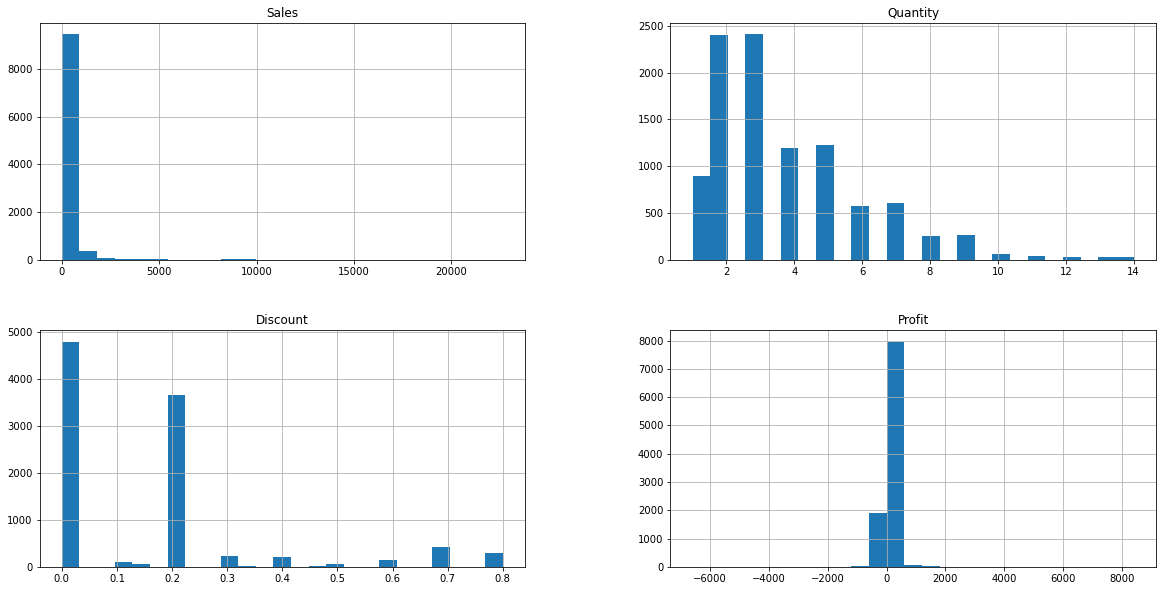

In [10]:
df.hist(bins=25,figsize=(20,10))
#df.boxplot()
plt.show()

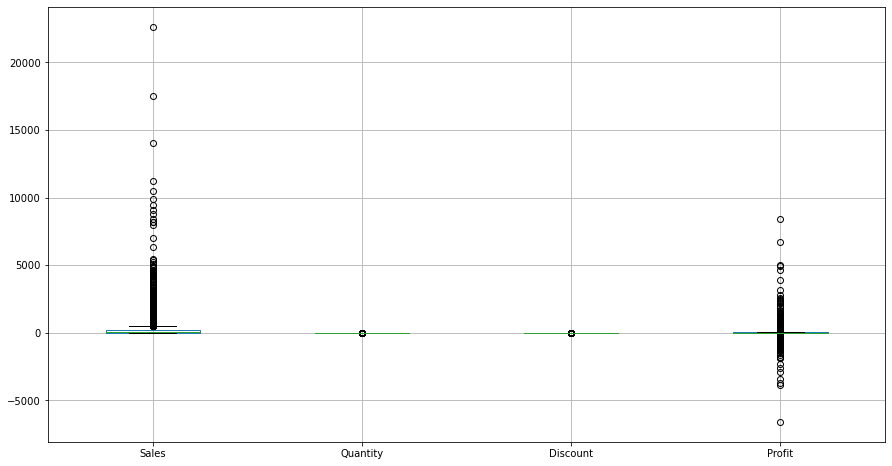

In [11]:
df.boxplot(figsize=[15,8])
plt.show()

As we can see in the given data set,the range of Sales, Quantity, Discount and Profit are on separate levels which might affect our analysis on later stages. In the below histogram and boxplot, as we can see there are many outliers present especially in Sales, but are very few outliers in Quantity and Discount and it is balanced on both sides in Profit.

# Data Analysis

#### Our target variable = Profit

To find weak areas where profit is going less. Lets start with exploring the data with visualization.
We will start with finding out the region with the lowest avg Profit and then start by breaking down further.

In [12]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [13]:
df.corr()['Profit'].sort_values()

Discount   -0.219487
Quantity    0.066253
Sales       0.479064
Profit      1.000000
Name: Profit, dtype: float64

# Regional Overview

In [14]:
# Grouping the data based on Region -
# we use group_by() to group different categories under one Main category in a varible/feature

df_group_one = df[['Region','Profit','Sales','Quantity','Discount']]
df_group_one = df_group_one.groupby(['Region'],as_index=False).mean()
# mean function fills the price with avg values of all occurrences of that Region  
df_group_one

,Region,Profit,Sales,Quantity,Discount
0,Central,17.092709,215.772661,3.779595,0.240353
1,East,32.135808,238.336110,3.728230,0.145365
2,South,28.857673,241.803645,3.832716,0.147253
3,West,33.849032,226.493233,3.829535,0.109335


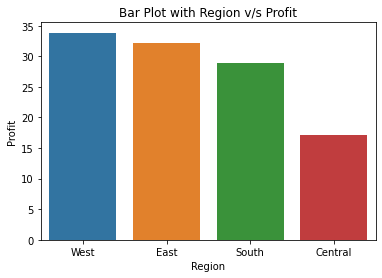

In [15]:
df_group_one = df_group_one.sort_values(['Profit'], ascending=False).reset_index(drop=True)

#sb.set(font_scale=1.5)
#plt.figure(figsize=[10,5])
sb.barplot(y = 'Profit',
            x = 'Region',
            data = df_group_one)

plt.title("Bar Plot with Region v/s Profit")
plt.ylabel('Profit')
plt.xlabel('Region')
plt.show()

In [16]:
df_group_one.corr()

,Profit,Sales,Quantity,Discount
Profit,1.000000,0.667392,0.112929,-0.981359
Sales,0.667392,1.000000,-0.004210,-0.622254
Quantity,0.112929,-0.004210,1.000000,-0.300339
Discount,-0.981359,-0.622254,-0.300339,1.000000


<AxesSubplot:>

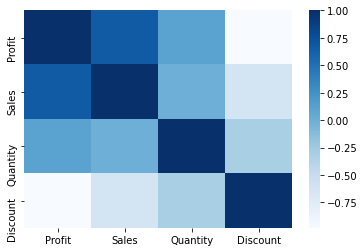

In [17]:
sb.heatmap(df_group_one.corr(), cmap="Blues")

In [18]:
# filtering out data of central region
df_central = df.loc[df['Region'] == 'Central']
df_central.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.810,5.0,0.8,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.544,3.0,0.8,-3.8160
16,Standard Class,Consumer,Madison,Wisconsin,Central,Office Supplies,Storage,665.880,6.0,0.0,13.3176
21,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Art,19.460,7.0,0.0,5.0596
22,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Appliances,60.340,7.0,0.0,15.6884


### States in Central Region avg profit

In [19]:
df_group_two = df_central[['State','Profit']]
df_group_two = df_group_two.groupby(['State'],as_index=False).mean()
# mean function fills the price with avg values of all occurrences of that State  
df_group_two.head()

,State,Profit
0,Illinois,-25.625787
1,Indiana,123.375411
2,Iowa,39.460397
3,Kansas,34.851813
4,Michigan,95.934069


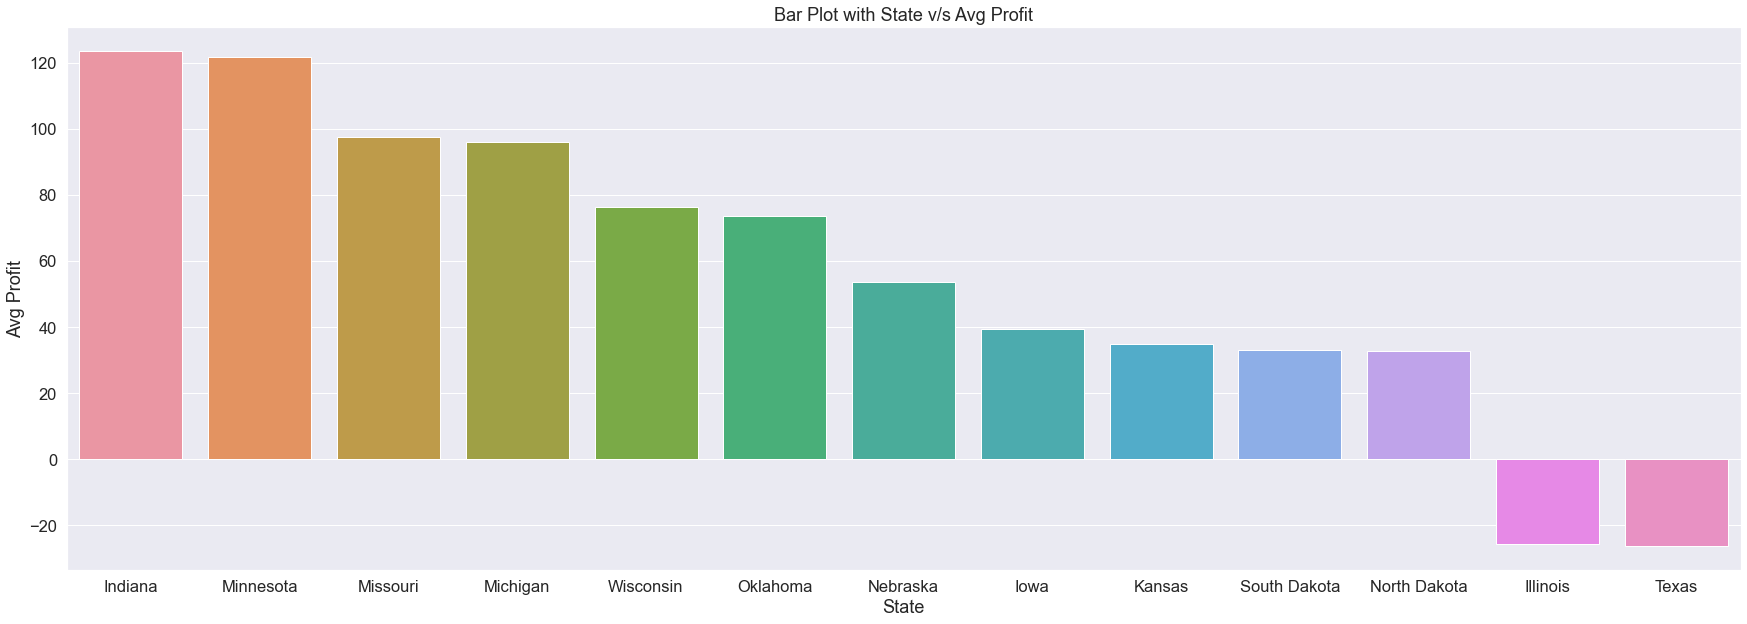

In [20]:
# barplot for above

df_group_two = df_group_two.sort_values(['Profit'], ascending=False).reset_index(drop=True)

sb.set(font_scale=1.5)
plt.figure(figsize=[30,10])
sb.barplot(y = 'Profit',
            x = 'State',
            data = df_group_two)

plt.title("Bar Plot with State v/s Avg Profit")
plt.ylabel('Avg Profit')
plt.xlabel('State')
plt.show()

### Conclusion 1 

As we can see the states of Illinois and Texas have a very low avg profit(-ve) while it starts increasing with Indianna and Minnesota with the highest avg profit. Lets find out more reasons and factors as to why this is happenning. 

<AxesSubplot:xlabel='Profit', ylabel='Category'>

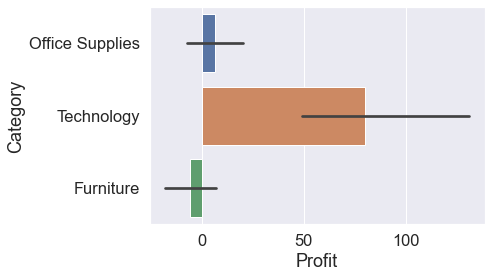

In [21]:
sb.barplot( x="Profit", y="Category" ,data=df_central)

### Conclusions 1 cont. - 
As we can see in the above graph Furniture Category has the lowest Avg Profit After in the Central Region. Lets breakdown further to see more factors affecting the profit of the category.

<AxesSubplot:xlabel='Sub-Category', ylabel='Quantity'>

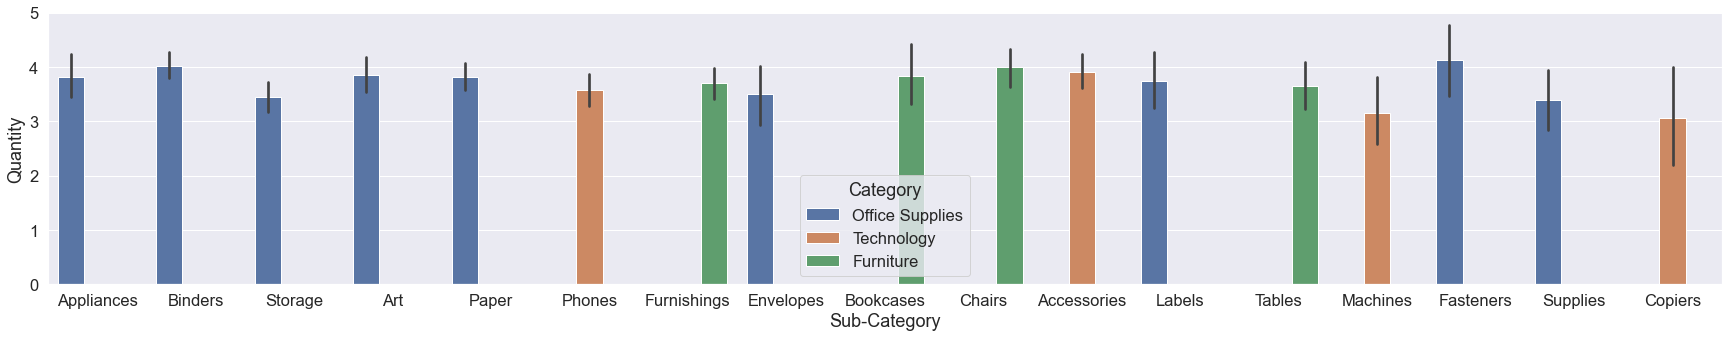

In [22]:
plt.figure(figsize=(30,5))
sb.barplot( y="Quantity", x="Sub-Category",hue="Category" ,data=df_central)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

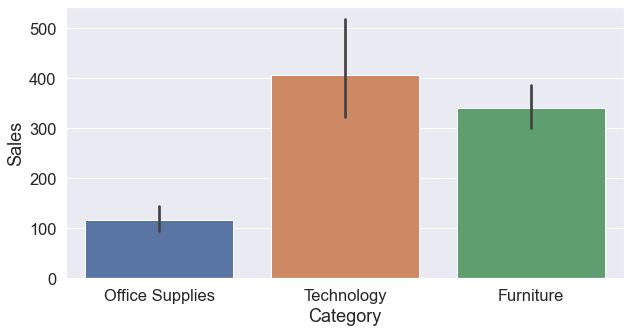

In [23]:
plt.figure(figsize=(10,5))
sb.barplot( y="Sales", x="Category",data=df_central)

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

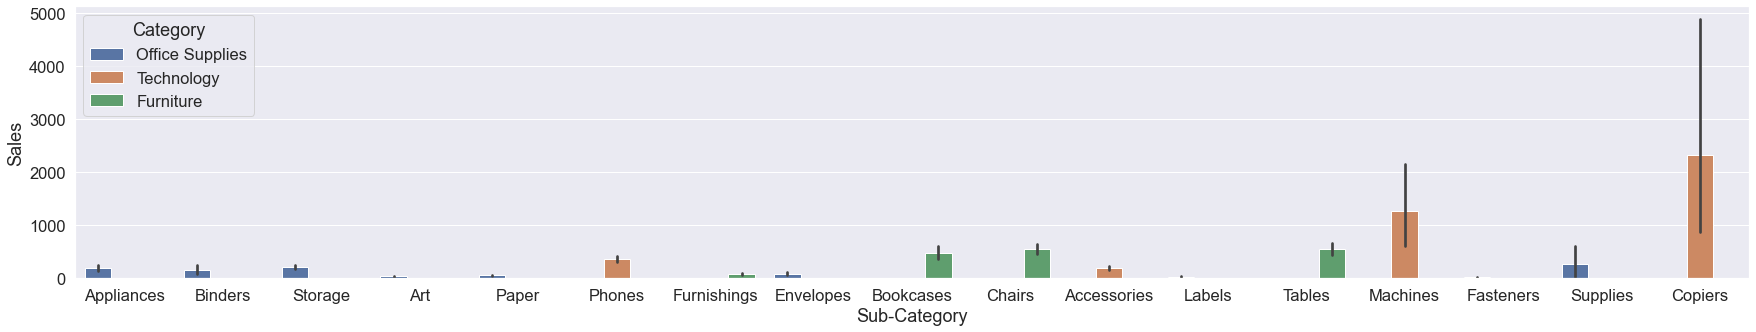

In [24]:
plt.figure(figsize=(30,5))
sb.barplot( y="Sales", x="Sub-Category",hue="Category" ,data=df_central)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

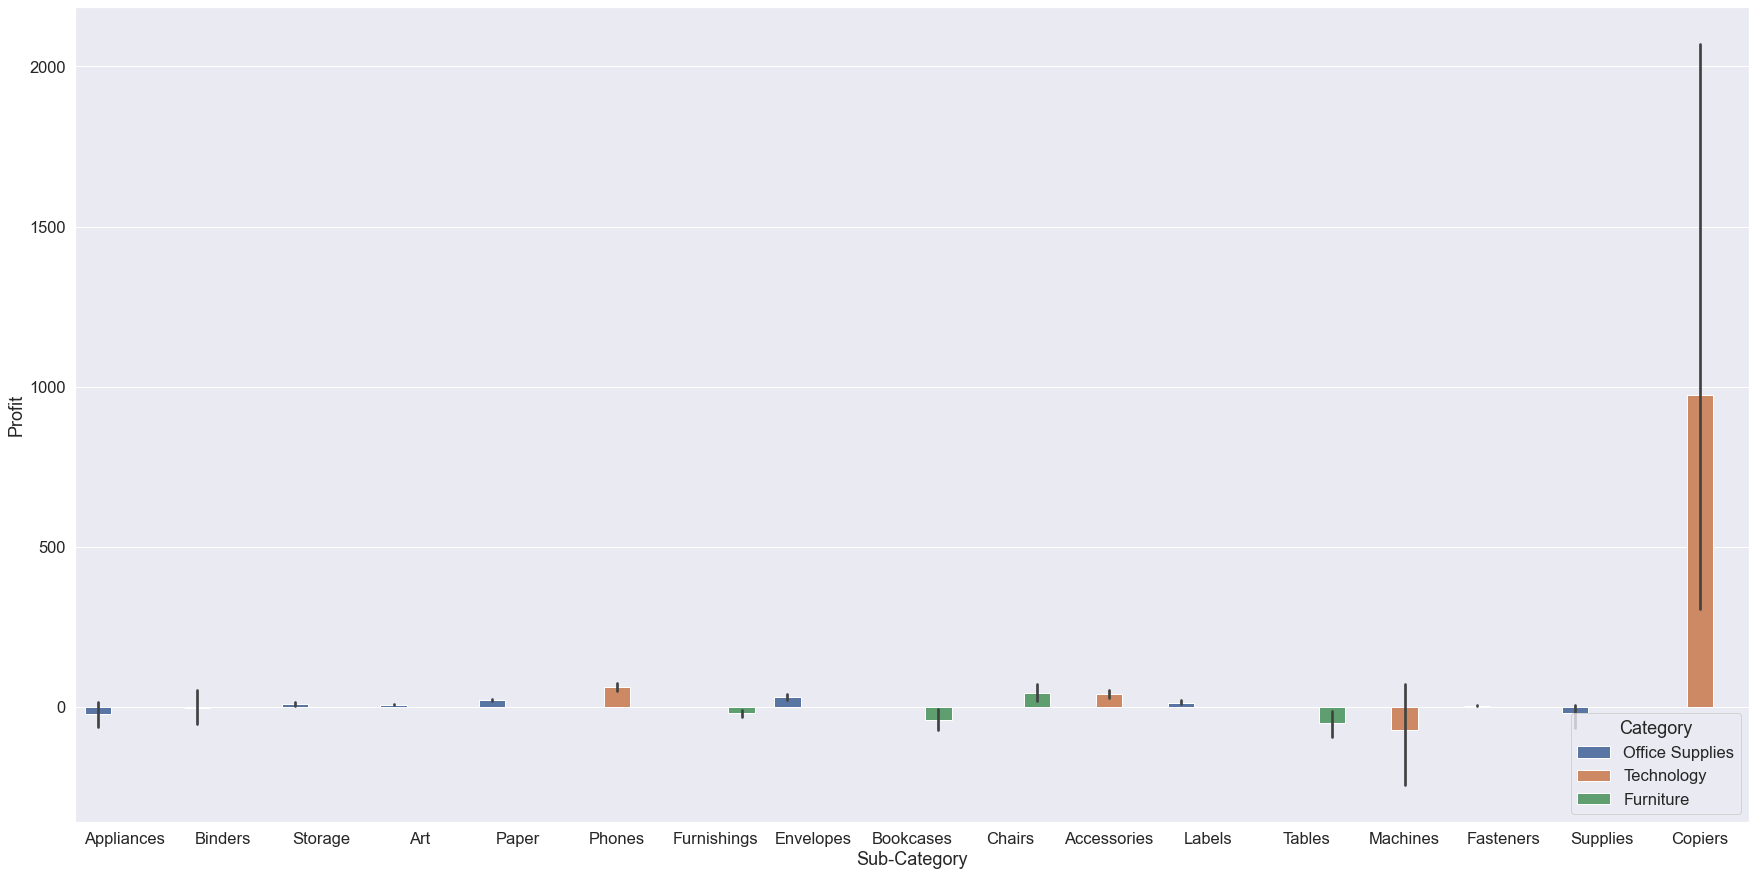

In [25]:
plt.figure(figsize=(30,15))
sb.barplot( y="Profit", x="Sub-Category",hue="Category" ,data=df_central)

### Conclusion 1 cont.

As we can had seen in the heatmap above, Sales has a positive Correlation with the Profit(~0.7). Thus in the above barplots as we can see, Avg Sales is comparitively very low in the Central region for Furniture Category and thus majorly affecting the the Avg Profit as well. The Avg Quantity as we can see is quite high for Furniture Category, but it is not up till the mark to get generate enough revenue and Profit, hence the relationship from heatmap above, between Quantity and Profit is also very weak whearas it is negative with Avg Sales.
 - Loss making Sub-Categories : Furnishings, Tables, Bookcases
 - Profit making Sub-Categories : Chairs

Few things to note here is - The Office Supply Category also has quite high avg Quantity for all of its Sub-Categories. The avg Sales of this Category is even lower. Here the no of sub-categories is higher than other categories, hence this is also a contributing factor to the overall avg Profit in this Region as even though the ang Quantity v/s avg Sales graph is negative slope, but has a very small value and avg Quantity v/s avg Profit scale is also very weakly positive but it comes higher when put together.
 - Loss making Sub-Categories - Appliances, Supplies, Binders
 - Profit making Sub-Categories - Storage, Art, Paper, Envelopes, Labels
 
Another important thing to focus is the avg loss generated by Machines sub category as well, even though the Technology category has the highest avg profit among all the three. 

<AxesSubplot:xlabel='Category', ylabel='Discount'>

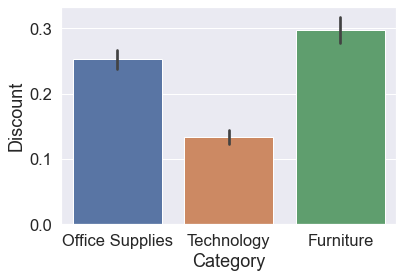

In [26]:
sb.barplot( y="Discount", x="Category" ,data=df_central)

<AxesSubplot:xlabel='Sub-Category', ylabel='Discount'>

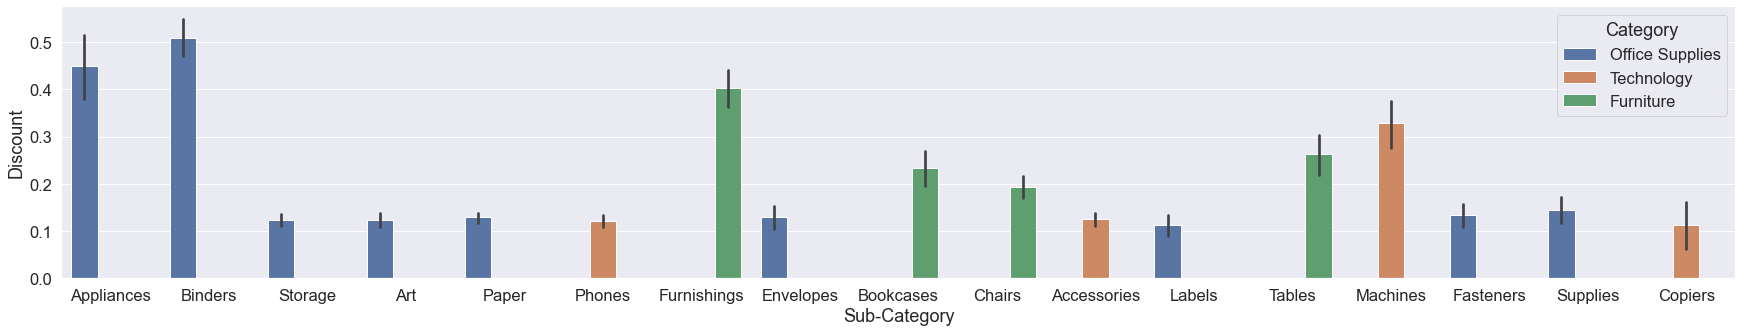

In [27]:
plt.figure(figsize=(30,5))
sb.barplot( y="Discount", x="Sub-Category",hue="Category" ,data=df_central)

### Conclusion 1 cont.

As we can see in the above graphs, the Discount is the highest for the Furniture and its sub-categories as compared to the other Categories. In the heatmap above we can see that Discount has negative relationship with both avg Profit(~ -0.98) and avg Sales(~ -0.64). Even after discounts the avg Sales in this region is low, which explains the negative relationship of the discount with all variables. 
Since the avg discount is lower for Office Supplies Category than Furniture Category, hence being one of the reasons it is on higher avg Profit range than Furniture Category. 

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

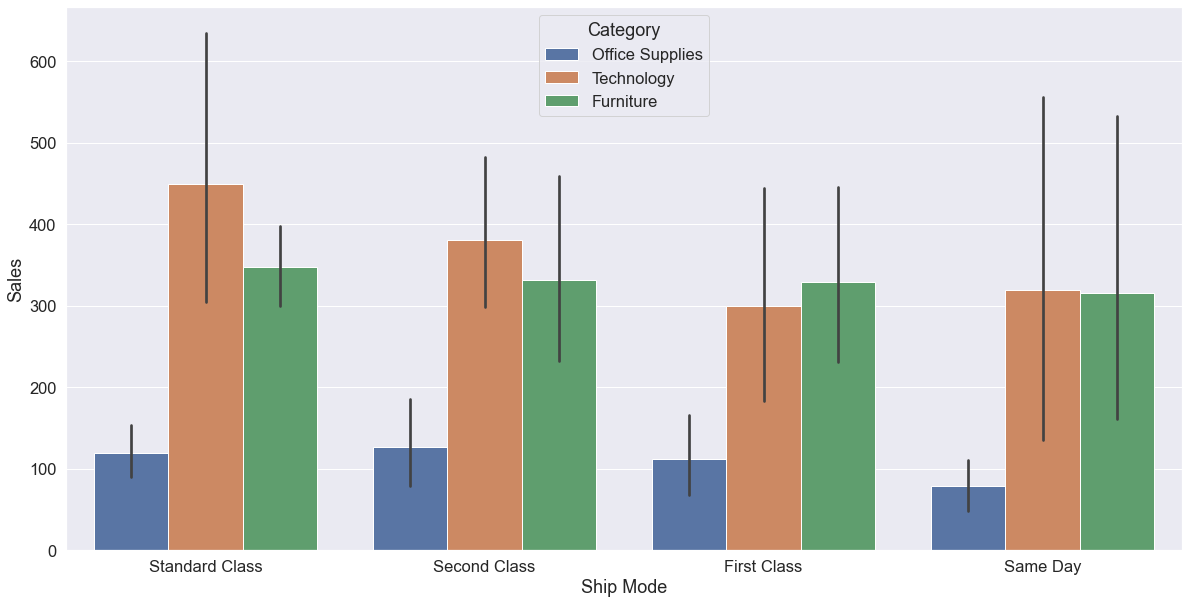

In [28]:
plt.figure(figsize=(20,10))
sb.barplot( y="Sales", x="Ship Mode",hue="Category" ,data=df_central)

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

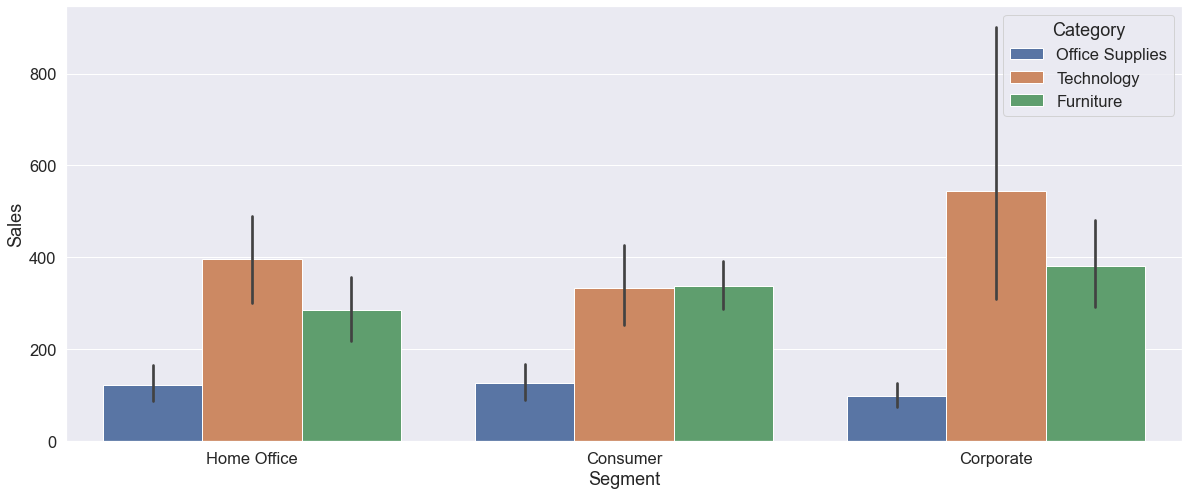

In [29]:
plt.figure(figsize=(20,8))
sb.barplot( y="Sales", x="Segment",hue="Category" ,data=df_central)

### Conclusion 1 cont.

- As we can see from the graphs, all the types of ship modes give almost equal amount of sales for Furniture Category as well as almost for Office Supplies category(except Same day). 
- As for the Segment of users, the Corporate users are the highest buyers of the Furniture Category, so we can target more on these users to increase the avg sales and profit. The sale of Office Supplies is almost equal among all the users of segment column hence, we can target more on all of these segments to increase the sales in this category.

# All States Overview

In [30]:
df_group = df[['State','Profit','Sales','Quantity','Discount']]
df_group = df_group.groupby(['State'],as_index=False).mean()
# mean function fills the price with avg values of all occurrences of that State  
df_group.head()

,State,Profit,Sales,Quantity,Discount
0,Alabama,94.865989,319.846557,4.196721,0.000000
1,Arizona,-15.303235,157.508933,3.848214,0.303571
2,Arkansas,66.811452,194.635500,4.000000,0.000000
3,California,38.171608,228.729451,3.831584,0.072764
4,Colorado,-35.867351,176.418231,3.807692,0.316484


In [31]:
df_group.shape

(49, 5)

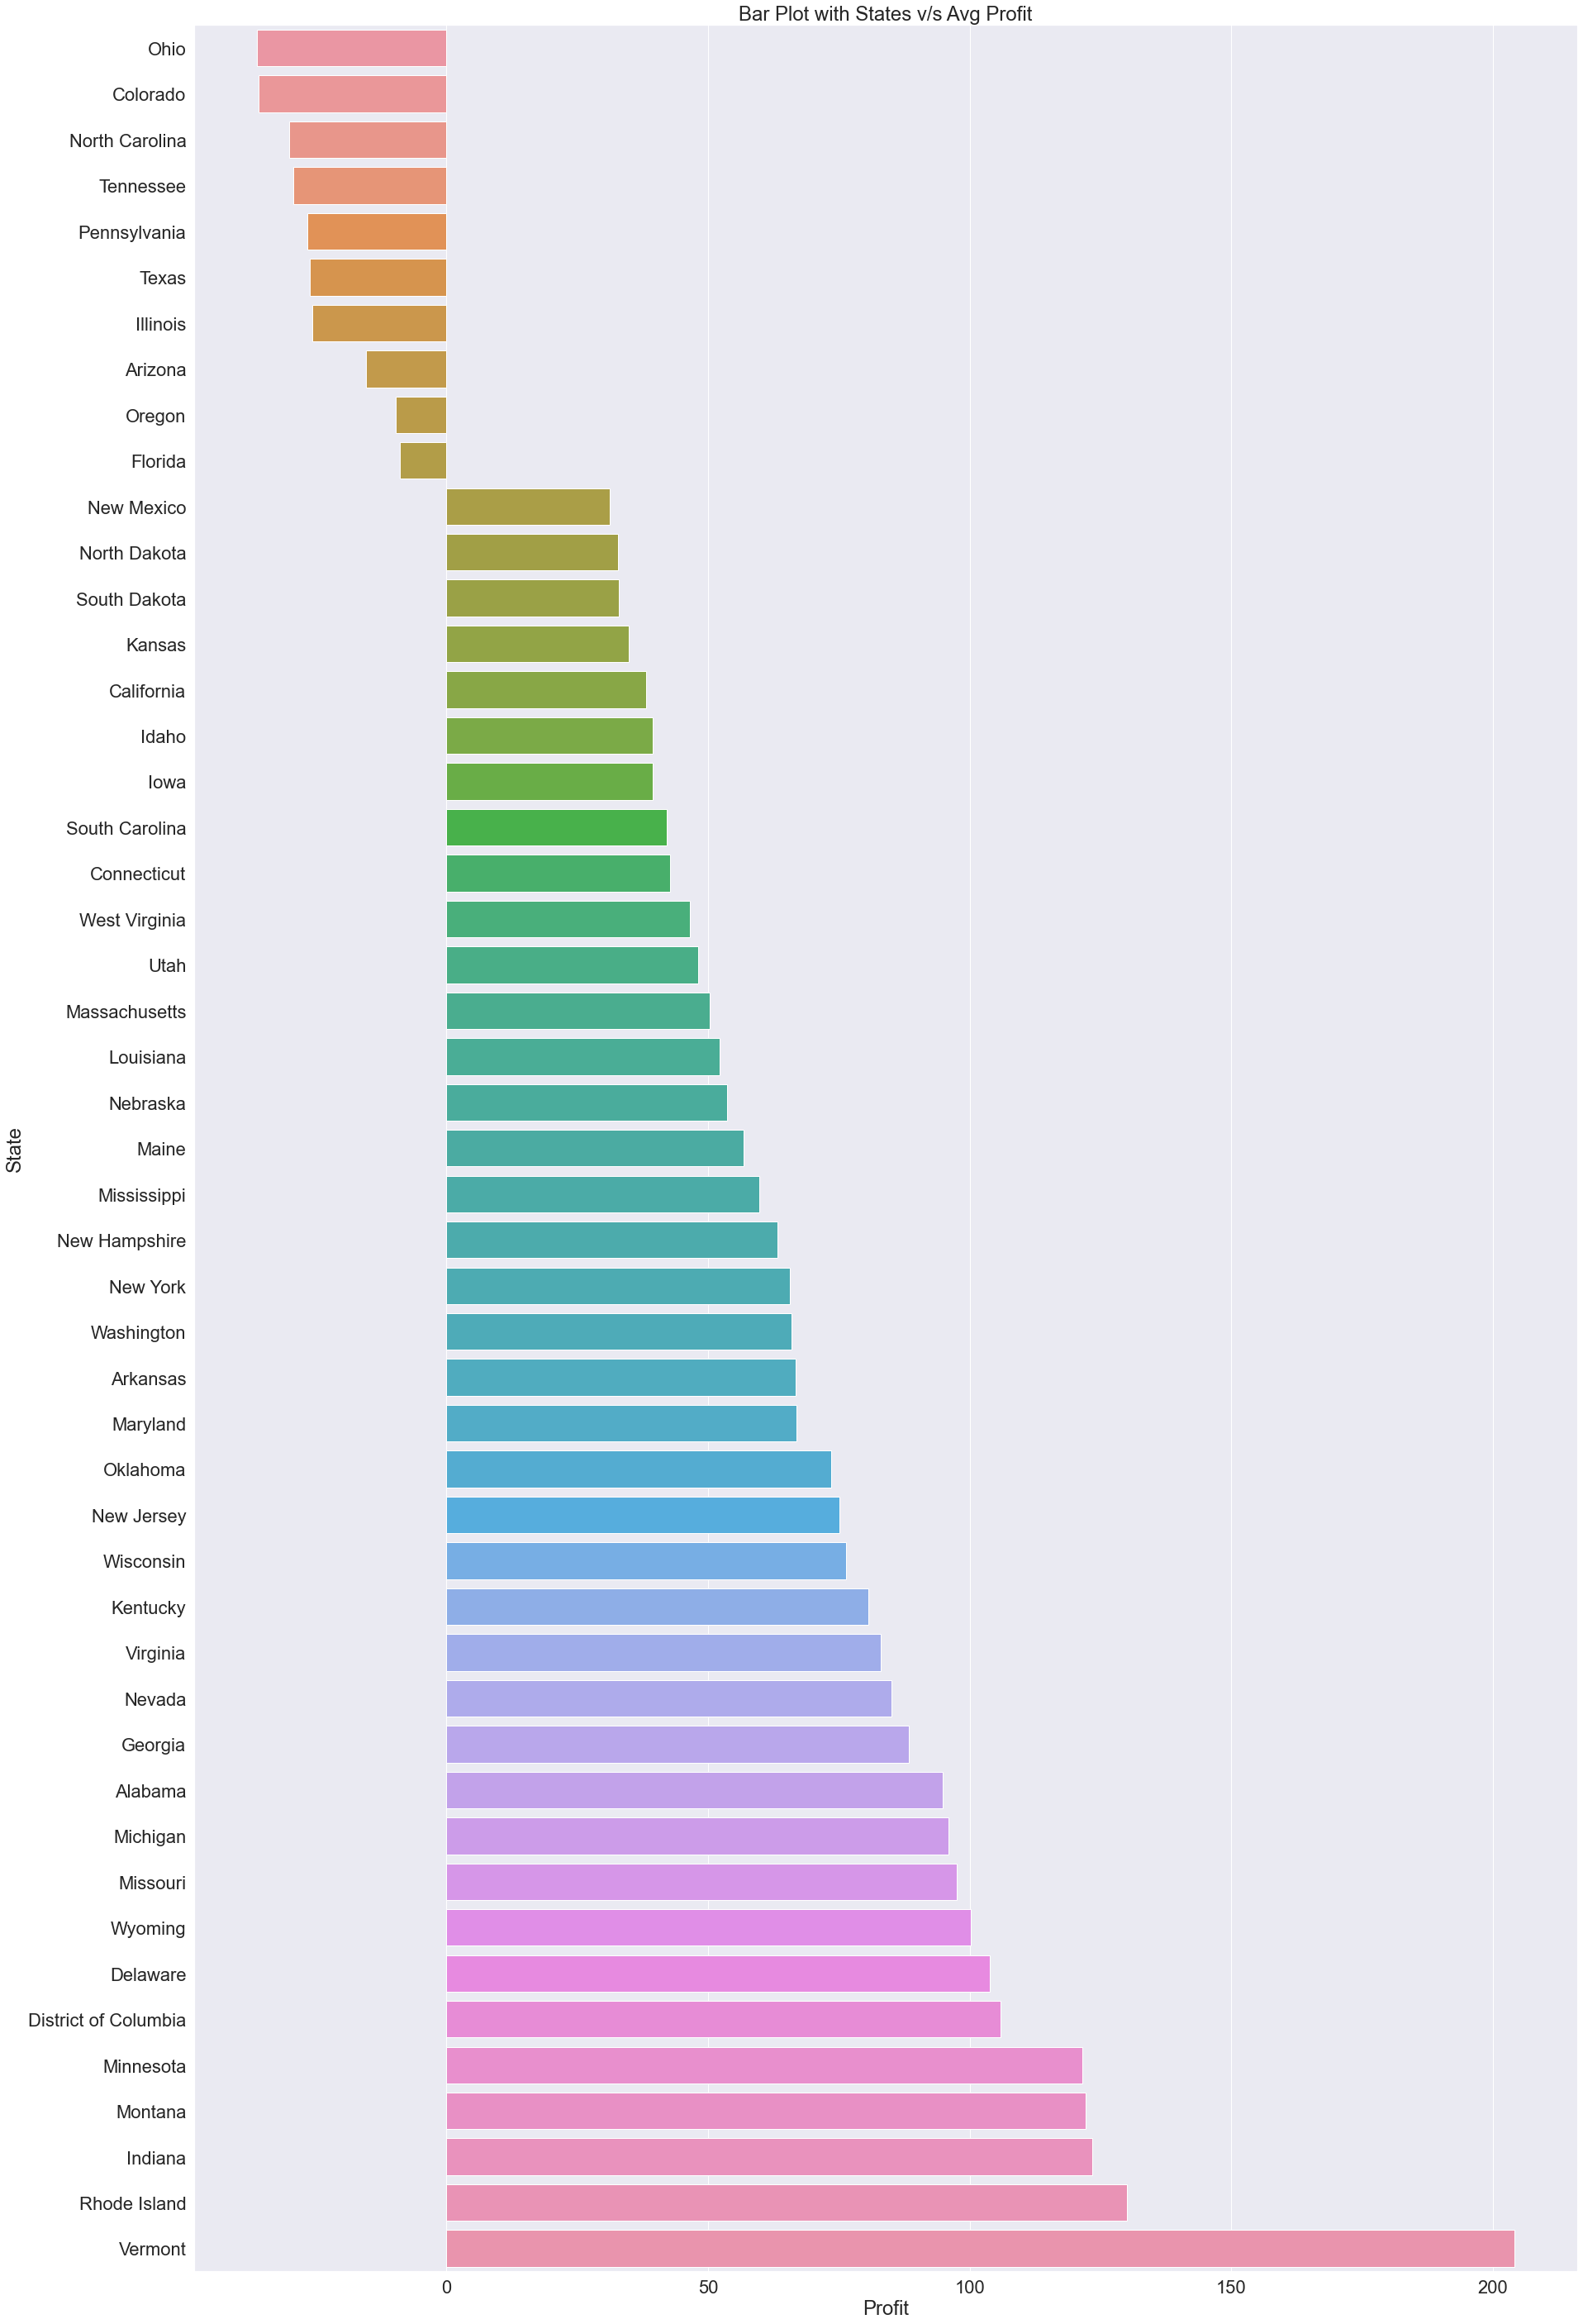

In [32]:
df_group = df_group.sort_values(['Profit'], ascending=True).reset_index(drop=True)
sb.set(font_scale=2)

plt.figure(figsize=[30,50])
sb.barplot(
           y = 'State',
           x = 'Profit',
           data = df_group)

plt.title("Bar Plot with States v/s Avg Profit")
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

### Conclusion 2

As we can see the states like Ohio, Colorado, Tennessee, Illinois etc. have a very low avg profit(-ve) while it starts increasing with Michigan, Indianna, Vermony etc. with the highest avg profit. Lets find out more reasons and factors as to why this is happenning. 

In [33]:
df_group.shape

(49, 5)

In [34]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

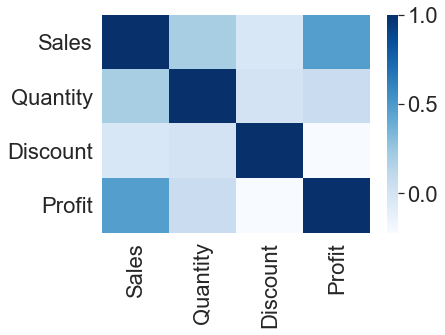

In [35]:
sb.heatmap(df.corr(),cmap='Blues')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

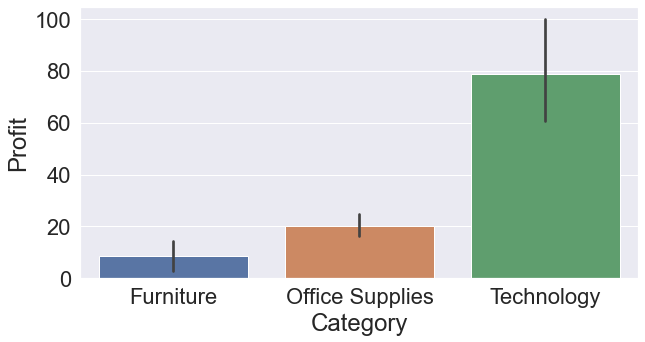

In [36]:
plt.figure(figsize=[10,5])
sb.barplot(y='Profit',x='Category',data=df)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

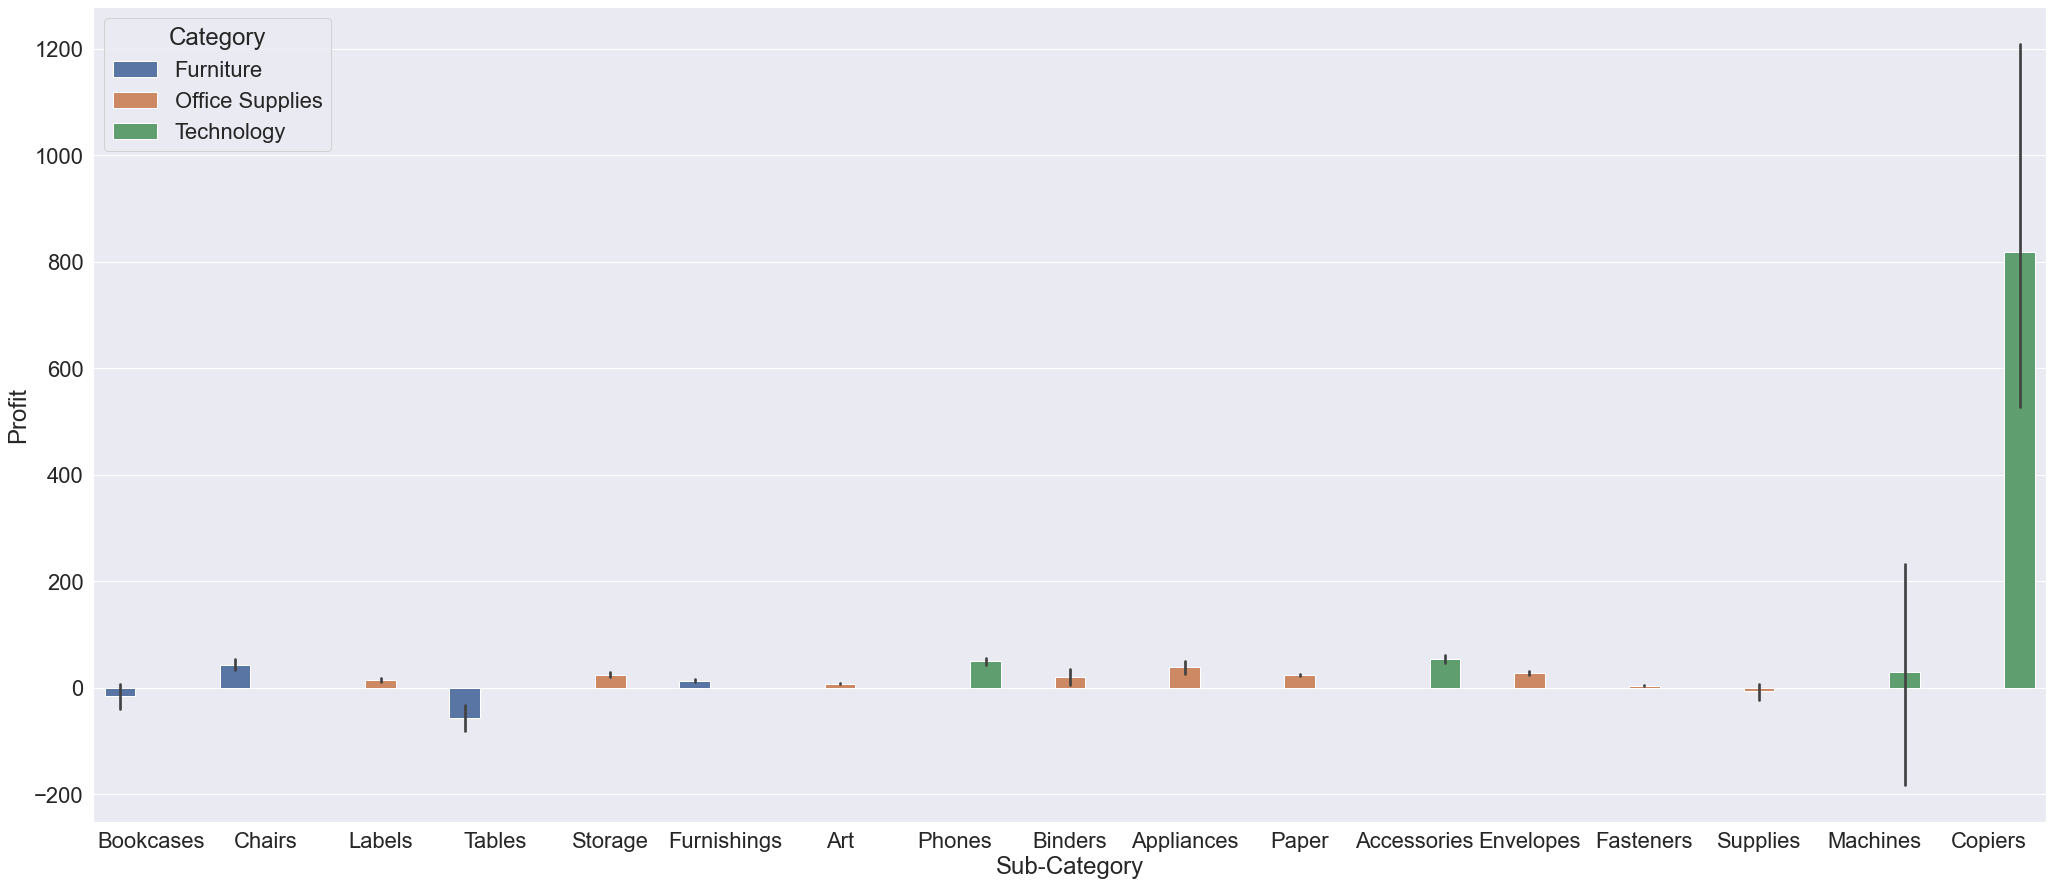

In [37]:
plt.figure(figsize=[35,15])
sb.barplot(y='Profit',x='Sub-Category',hue='Category',data=df)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

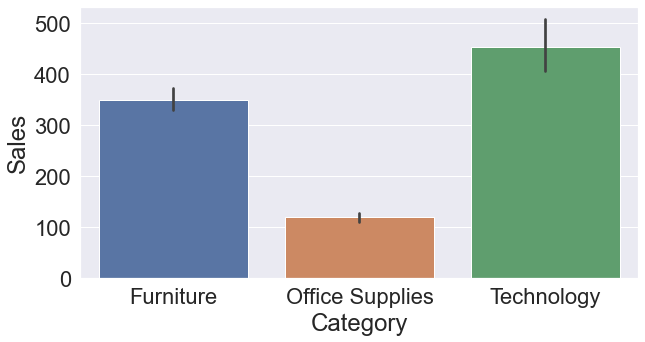

In [38]:
plt.figure(figsize=[10,5])
sb.barplot(y='Sales',x='Category',data=df)

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

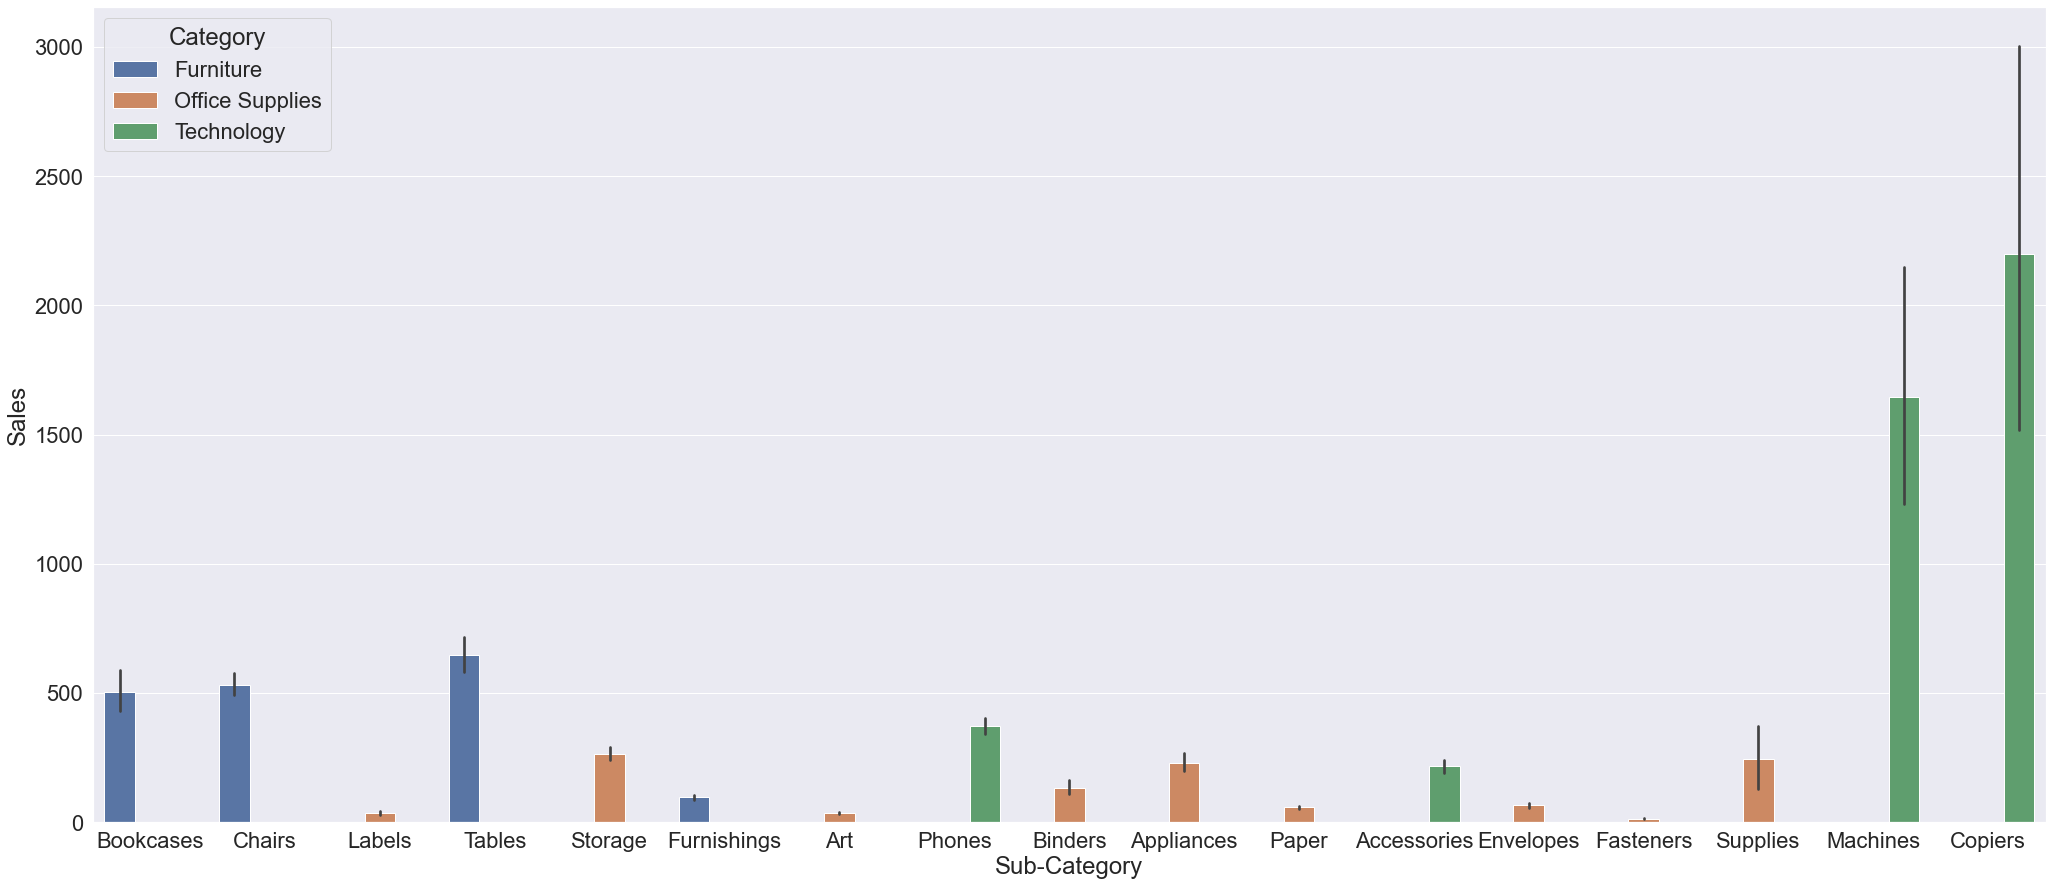

In [39]:
plt.figure(figsize=[35,15])
sb.barplot(y='Sales',x='Sub-Category',hue='Category',data=df)

<AxesSubplot:xlabel='Sub-Category', ylabel='Quantity'>

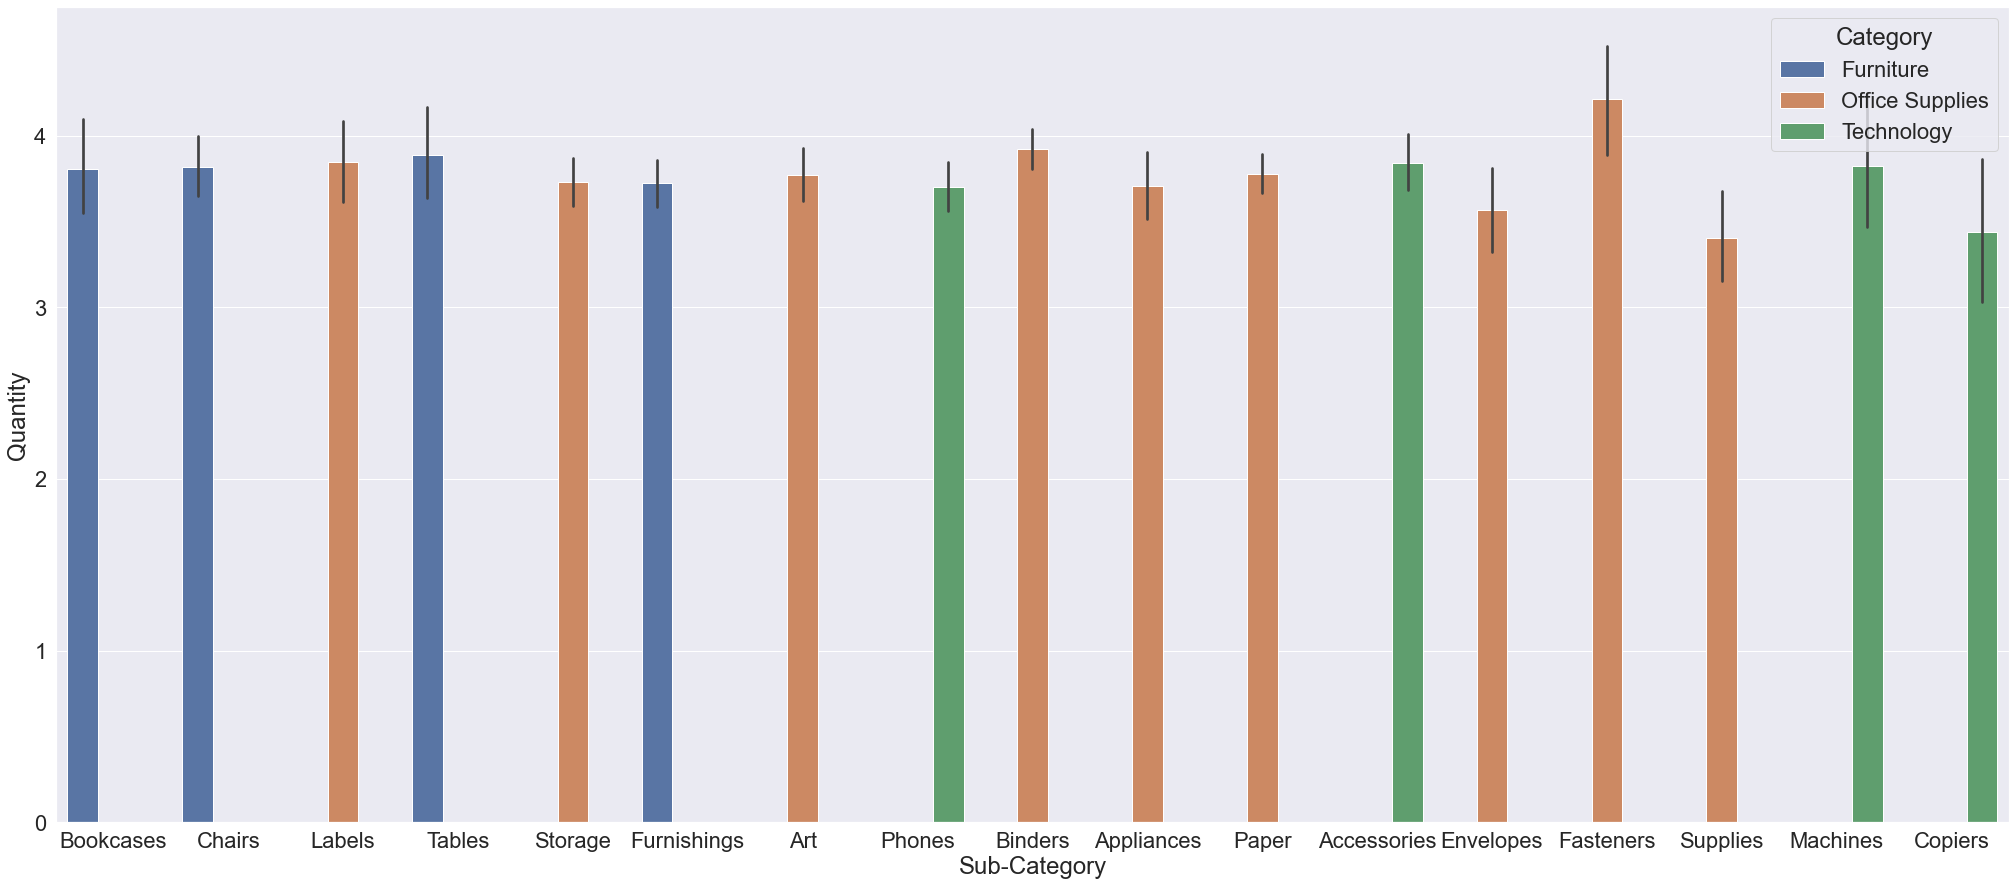

In [40]:
plt.figure(figsize=[35,15])
sb.barplot(y='Quantity',x='Sub-Category',hue='Category',data=df)

<AxesSubplot:xlabel='Category', ylabel='Discount'>

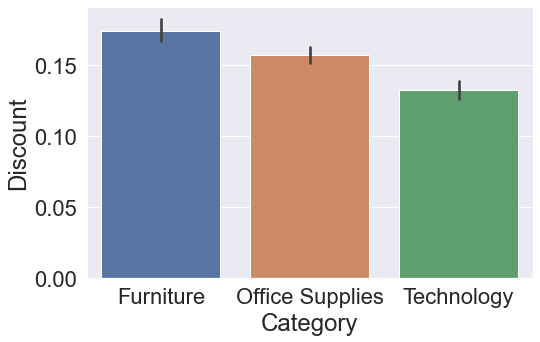

In [41]:
plt.figure(figsize=[8,5])
sb.barplot( y="Discount", x="Category" ,data=df)

### Conclusion 2 cont.

As we can see in the above graph Furniture Category has the lowest Avg Profit. Lets breakdown further to see more factors affecting the profit of the category.

As we can had seen in the heatmap above, Sales has a positive Correlation with the Profit(~0.5). Thus in the above barplots as we can see, Avg Sales is comparitively very low for Furniture Category and thus majorly affecting the the Avg Profit as well. The Avg Quantity as we can see is quite high for Furniture Category, but it is not up till the mark to get generate enough revenue and Profit, hence the relationship from heatmap above, between Quantity and Profit is also very weak whearas it is negative with Avg Sales.
- Loss making sub-categories : Bookcases, Tables, Supplies

The Office Supply Category also has quite high avg Quantity for all of its Sub-Categories. The avg Sales of this Category is even lower. Here the no of sub-categories is higher than other categories, hence this is also a contributing factor to the overall avg Profit in this Region as even though the ang Quantity v/s avg Sales graph is negative slope, but has a very small value and avg Quantity v/s avg Profit scale is also very weakly positive but it comes higher when added.

The Discount is the highest for the Furniture and its sub-categories as compared to the other Categories. In the heatmap above we can see that Discount has negative relationship with both avg Profit(~ -0.22) and avg Sales(~ -0.03). Even after discounts the avg Sales in this region is low, which explains the negative relationship of the discount with both the variables. 


<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

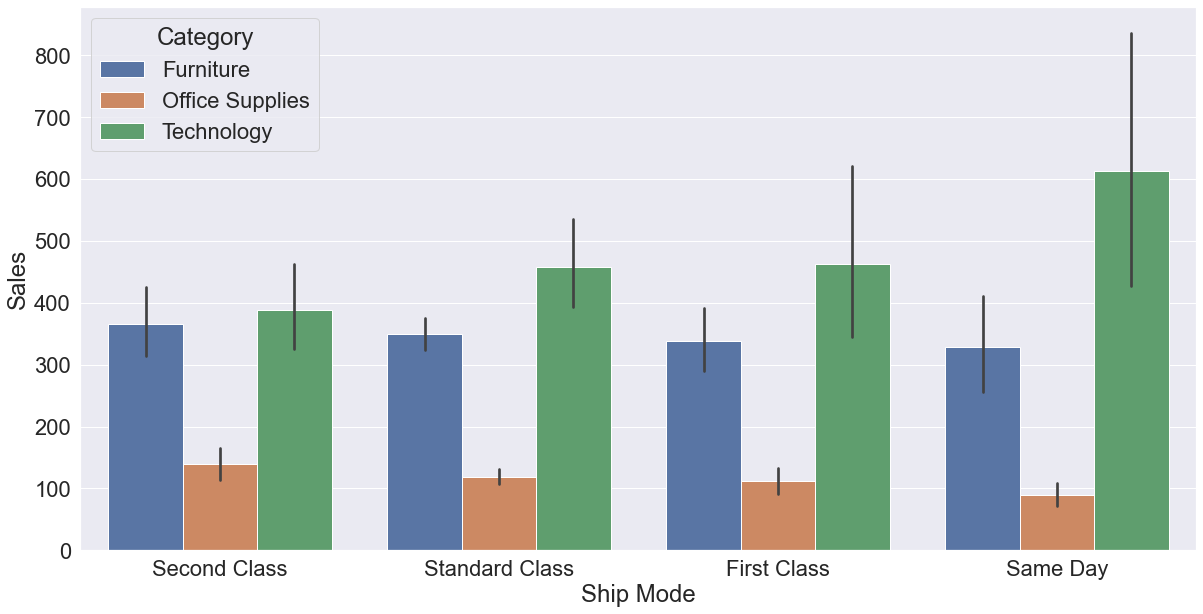

In [42]:
plt.figure(figsize=(20,10))
sb.barplot( y="Sales", x="Ship Mode",hue="Category" ,data=df)

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

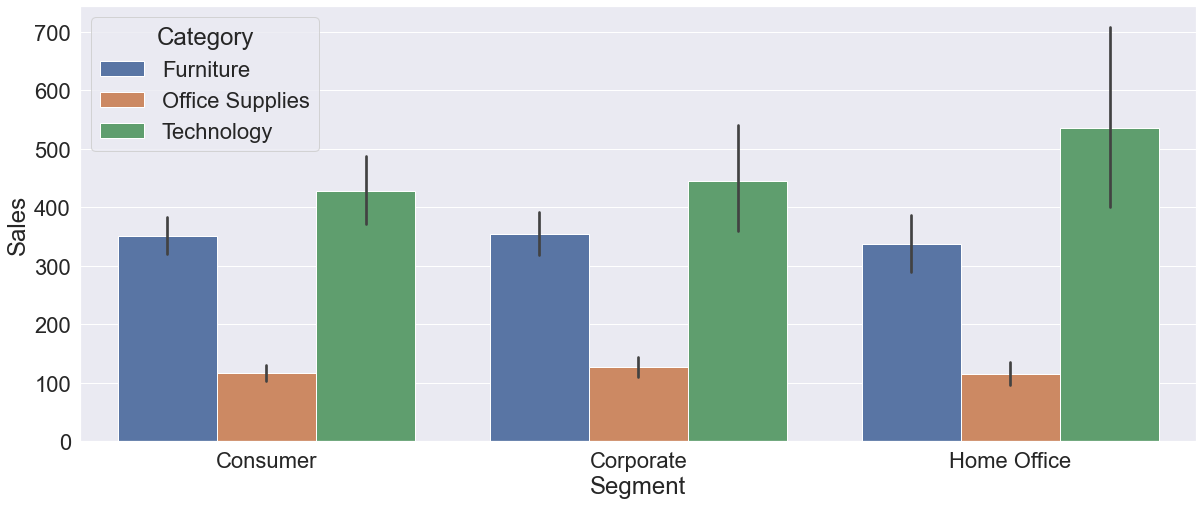

In [43]:
plt.figure(figsize=(20,8))
sb.barplot( y="Sales", x="Segment",hue="Category" ,data=df)

### Conclusion 2 cont.

- As we can see from the graphs, all the types of ship modes give almost equal amount of sales for Furniture Category as well as almost for Office Supplies category, hence the feature is equally used. 
- As for the Segment of users, all the users are the highest buyers of the Furniture Category, so we can target on all the segments. The sale of Office Supplies is almost equal among all the users of segment column hence, we can target more on all of these segments to increase the sales in this category.

# End